# Did Fandango Adjust Its Ratings? A Comparison of 2015 and 2016 Data

## Table of Contents

1. [Introduction](#Introduction)  
2. [Loading and Examining the Data](#Loading-and-Examining-the-Data)  
3. [Observations and Goal Adjustment](#Observations-and-Goal-Adjustment)  
4. [Evaluating Representativity of the Samples](#Evaluating-Representativity-of-the-Samples)  
5. [Filtering by Year (2015 and 2016) for the Datasets](#Filtering-by-Year-(2015-and-2016)-for-the-Datasets)  
6. [Distribution of Fandango Movie Ratings for 2015 and 2016](#Distribution-of-Fandango-Movie-Ratings-for-2015-and-2016)  
7. [Comparison of Mean, Median and Mode of Movie Ratings 2015 vs. 2016](#Comparison-of-Mean,-Median-and-Mode-of-Movie-Ratings-2015-vs-2016)  
8. [Conclusion](#Conclusion)  

## Introduction

This project investigates whether Fandango adjusted its movie rating system for popular films between 2015 and 2016. The goal is to determine if Fandango’s ratings became more reflective of user reviews after a 2015 critique exposed inflated scores. The analysis focuses on popular movies (defined as those with at least 30 fan ratings) released in these two years.  

To achieve this, I compared rating distributions using kernel density plots, calculated summary statistics (mean, median, and mode), and analyzed frequency distributions. These methods provided a comprehensive comparison while accounting for differences in sample sizes between the datasets for 2015 and 2016.  

The results show that both years’ ratings are left-skewed, with high ratings dominating. However, the mean rating dropped from **4.08** in 2015 to **3.89** in 2016, and the mode shifted from **4.5** to **4.0**. These findings suggest a small but notable shift in Fandango’s ratings, indicating a potential response to earlier criticisms of inflated scores.

## Loading and Examining the Data

In [5]:
import pandas as pd

# Load the two datasets
hickey_data = pd.read_csv('fandango_score_comparison.csv')
recent_data = pd.read_csv('movie_ratings_16_17.csv')

In [6]:
hickey_data.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [7]:
hickey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [8]:
recent_data.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [9]:
recent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [10]:
# Select relevant columns for the dataset before Hickey's analysis
fandango_before = hickey_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

# Select relevant columns for the dataset after Hickey's analysis
fandango_after = recent_data[['movie', 'year', 'fandango']]

fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [11]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Observations and Goal Adjustment

---

### Initial Observations

The initial goal was to investigate changes in Fandango's rating system following Walt Hickey's 2015 analysis. After reviewing the datasets and documentation, the following observations were made:

1. **Population of Interest**:  
   Includes all movie ratings on Fandango, regardless of release year.  

2. **Sampling Criteria for 2015 Data**:  
   - Movies had at least 30 fan ratings on Fandango by August 24, 2015.  
   - Tickets for these movies were on sale in 2015.  
   - Sampling was **not random**, excluding movies with fewer fan ratings or no 2015 ticket sales.  

3. **Sampling Criteria for 2016-2017 Data**:  
   - Movies were released in 2016 or later.  
   - Movies required a "considerable" number of votes and reviews (threshold unspecified).  
   - This sample was also **not random**, reflecting temporal trends.

These purposive sampling methods introduce biases, making the datasets unrepresentative of all Fandango movie ratings.

---

### Limitations of the Data

- **Temporal Trends**:  
   - The 2015 sample reflects movies in theaters that year, potentially skewed by unique characteristics.  
   - The 2016-2017 sample includes post-2015 releases, possibly differing in quality, genre, or audience preferences.  

- **Lack of Representativeness**:  
   Neither sample provides a complete view of all movies rated on Fandango.

---

### Adjusting the Goal

**New Goal**:  
To compare Fandango’s ratings for popular movies in 2015 with popular movies in 2016.

---

### Reasons for Goal Change

1. **Sample Bias**:  
   Purposive sampling limits the suitability of these datasets for analyzing all Fandango ratings.  

2. **Practicality**:  
   The new goal aligns better with the data, enabling meaningful comparisons between two well-defined samples.  

3. **Proxy for Original Goal**:  
   While not directly measuring changes to the rating system, this approach offers a useful proxy by analyzing ratings across two adjacent time periods.

---

This adjusted goal ensures the analysis remains focused, reliable, and grounded in the data, while still delivering valuable insights.

## Evaluating Representativity of the Samples

In [14]:
# Check for movies with less than 30 ratings on Fandango
fandango_before[fandango_before['Fandango_votes'] < 30]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


In [15]:
# Randomly sampling 10 rows from the 'fandango_after' DataFrame, with a fixed random seed (777) for reproducibility
fandango_after.sample(n=10, random_state=777)

,movie,year,fandango
12,Arrival,2016,4.0
198,The Whole Truth,2016,3.0
26,Blood Father,2016,4.0
203,Underworld: Blood Wars,2016,4.0
33,Cell,2016,3.0
45,Eddie the Eagle,2016,4.5
192,The Purge: Election Year,2016,4.0
144,Sing Street,2016,4.5
96,Lion,2016,4.0
139,Risen,2016,4.5


## Research Approach: Evaluating Representativity of the 2016 Sample

---

### Populations of Interest
The analysis focuses on two key populations:
1. Fandango's ratings for popular movies released in 2015.  
2. Fandango's ratings for popular movies released in 2016.  

---

### Defining "Popular Movies"
A "popular movie" is defined as any movie with **30 or more fan ratings** on Fandango's website, consistent with Walt Hickey's original criteria.

---

### Assessing Representativity of the 2016 Sample
The 2016 dataset mentions popularity as a selection criterion but lacks specific information on fan ratings. To confirm its representativity, we evaluated whether the dataset predominantly consists of popular movies.

#### Validation Plan:
1. **Random Sampling**:  
   Randomly select 10 movies from the 2016 dataset for evaluation.  

2. **Manual Validation**:  
   Check the number of fan ratings for each selected movie on Fandango (or alternative sources if unavailable).  

3. **Criteria for Representativity**:  
   If at least **8 out of 10 movies** have 30 or more fan ratings, the dataset is considered representative of popular movies.

---

### Fan Ratings Analysis for 10 Selected Movies
Due to Fandango’s inaccessibility outside the USA, IMDb was used as an alternative source for fan rating data. Below are the results:

| Movie                          | IMDb Fan Ratings  |
|--------------------------------|-------------------|
| Arrival                        | ~739,000          |
| The Whole Truth                | ~16,000           |
| Blood Father                   | ~24,000           |
| Underworld: Blood Wars         | ~56,000           |
| Cell                           | ~17,000           |
| Eddie the Eagle                | ~54,000           |
| The Purge: Election Year       | ~82,000           |
| Sing Street                    | ~89,000           |
| Lion                           | ~260,000          |
| Risen                          | ~22,000           |

---

### Summary
- All sampled movies meet the "popular" criteria based on IMDb ratings.  
- While IMDb provides a useful alternative, differences between platforms like Fandango and IMDb (e.g., audience demographics and regional preferences) may lead to variations in ratings.  

This analysis supports the representativity of the 2016 sample for evaluating popular movies.

In [17]:
# Checking the distribution of the 'year' column to understand the number of movies per year
fandango_after['year'].value_counts()

year
2016    191
2017     23
Name: count, dtype: int64

In [18]:
# Filtering the dataset to include only the movies released in 2016 and creating a copy to avoid modifying the original dataset
fandango_after_2016 = fandango_after[fandango_after['year'] == 2016].copy()

# Displaying the first few rows of the filtered dataset to verify the result
fandango_after_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


In [19]:
# Extract the year as an integer and assign it to the 'year' column
fandango_before = fandango_before.copy()
fandango_before.loc[:, 'year'] = fandango_before['FILM'].str[-5:-1].astype(int)

fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [20]:
# Checking the distribution of the 'year' column to understand the number of movies per year
fandango_before['year'].value_counts()

year
2015    129
2014     17
Name: count, dtype: int64

In [21]:
# Filtering the dataset to include only the movies released in 2015 and creating a copy to avoid modifying the original dataset
fandango_before_2015 = fandango_before[fandango_before['year'] == 2015].copy()

# Displaying the first few rows of the filtered dataset to verify the result
fandango_before_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


## Filtering by Year (2015 and 2016) for the Datasets

To analyze Fandango ratings, the datasets were filtered to focus on movies from 2015 and 2016. This approach allows for a direct comparison of ratings to assess potential differences in Fandango’s rating system.

---

### Filtering the `fandango_before` Dataset (2015)
- The `fandango_before` dataset was filtered for movies released in 2015.  
- Using the 'FILM' column (which includes the movie title and release year), the last four characters were sliced to extract the year.  
- The extracted values were converted to integers and stored in a `year` column, which was then filtered to include only 2015 movies.

---

### Filtering the `fandango_after` Dataset (2016)
- The `fandango_after` dataset was filtered for movies released in 2016.  
- The 'year' column, already included in the dataset, was used to isolate movies from 2016 for analysis.

---

This filtering ensures a focused comparison of ratings from 2015 and 2016, aligning with the study’s goal of evaluating changes in Fandango’s rating system.

## Distribution of Fandango Movie Ratings for 2015 and 2016

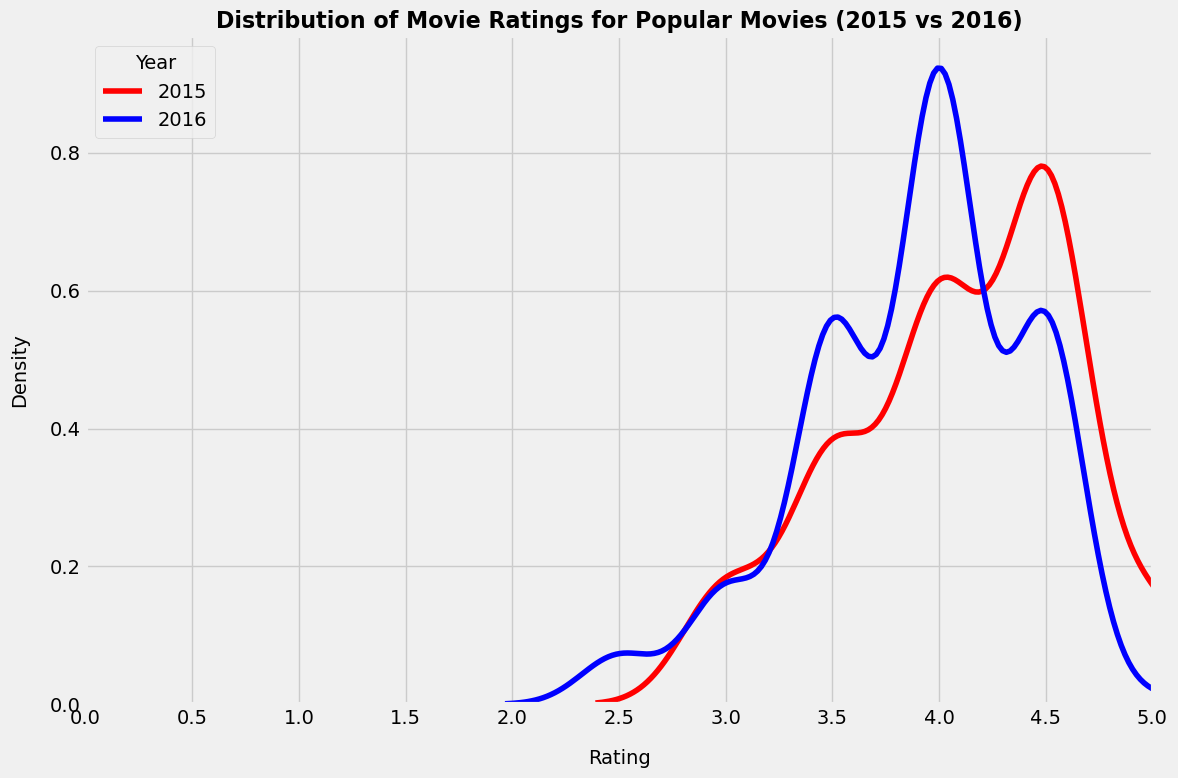

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Plot the kernel density estimates for both samples
plt.figure(figsize=(12, 8))

# Plot for 2015 sample
sns.kdeplot(fandango_before_2015['Fandango_Stars'], label='2015', color='red')

# Plot for 2016 sample
sns.kdeplot(fandango_after_2016['fandango'], label='2016', color='blue')

# Customize the plot with a title, labels, and legend
plt.title('Distribution of Movie Ratings for Popular Movies (2015 vs 2016)', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=14, labelpad=15)
plt.ylabel('Density', fontsize=14, labelpad=15)

# Set the x-axis to range from 0 to 5 with specified tick labels
plt.xlim(0, 5)
plt.xticks([i * 0.5 for i in range(11)])

# Add a legend to differentiate the two distributions
plt.legend(title='Year', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [25]:
# Calculate the relative frequency (in percentages) of each unique value in the 'Fandango_Stars' column.
# Normalize=True ensures the frequencies are expressed as proportions of the total count.
# sort_index() orders the values by their star rating for better readability.
# Multiplying by 100 converts the proportions to percentages.
fandango_before_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

Fandango_Stars
3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: proportion, dtype: float64

In [26]:
# Calculate the relative frequency (in percentages) of each unique value in the 'fandango' column.
# Normalize=True ensures the frequencies are expressed as proportions of the total count.
# sort_index() orders the values by their rating for easier interpretation.
# Multiplying by 100 converts the proportions to percentages.
fandango_after_2016['fandango'].value_counts(normalize=True).sort_index() * 100

fandango
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: proportion, dtype: float64

## Analysis of Fandango Ratings for 2015 and 2016
---

### Observations from Kernel Density Plots
The kernel density plots of movie ratings for 2015 and 2016 highlight the following:  
- Both distributions are **left-skewed**, indicating that Fandango ratings tend to be high or very high.  
- The 2016 distribution shows a slight **leftward shift** compared to 2015, suggesting marginally lower ratings in 2016.  
- This shift supports the research goal of exploring potential changes in Fandango's rating system, indicating a subtle difference between the two years.

---

### Absolute vs. Relative Frequencies
- **Relative frequencies** are used instead of absolute counts to account for the differing sample sizes in 2015 and 2016. This ensures a fair comparison of the rating distributions.

---

### Proportions or Percentages?
- For better clarity, **percentages** are used instead of raw proportions.  
  For example, "20% of movies were rated between 4.0 and 4.5" is more intuitive than "0.2 of the movies."

---

By integrating insights from the kernel density plots and frequency distributions, we gain a clearer understanding of the differences in Fandango ratings between 2015 and 2016.

## Comparison of Mean, Median and Mode of Movie Ratings 2015 vs 2016

In [30]:
# Compute summary statistics for 2015
mean_2015 = fandango_before_2015['Fandango_Stars'].mean()  # Calculate the mean for 2015 ratings
median_2015 = fandango_before_2015['Fandango_Stars'].median()  # Calculate the median for 2015 ratings
mode_2015 = fandango_before_2015['Fandango_Stars'].mode()[0]  # Calculate the mode for 2015 ratings

# Compute summary statistics for 2016
mean_2016 = fandango_after_2016['fandango'].mean()  # Calculate the mean for 2016 ratings
median_2016 = fandango_after_2016['fandango'].median()  # Calculate the median for 2016 ratings
mode_2016 = fandango_after_2016['fandango'].mode()[0]  # Calculate the mode for 2016 ratings

# Combine the statistics into a DataFrame for better readability and comparison
summary_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],  # Name of each statistic
    '2015': [mean_2015, median_2015, mode_2015],  # Values for 2015
    '2016': [mean_2016, median_2016, mode_2016]   # Values for 2016
})

# Display the summary statistics DataFrame
summary_stats

,Statistic,2015,2016
0,Mean,4.085271,3.887435
1,Median,4.000000,4.000000
2,Mode,4.500000,4.000000


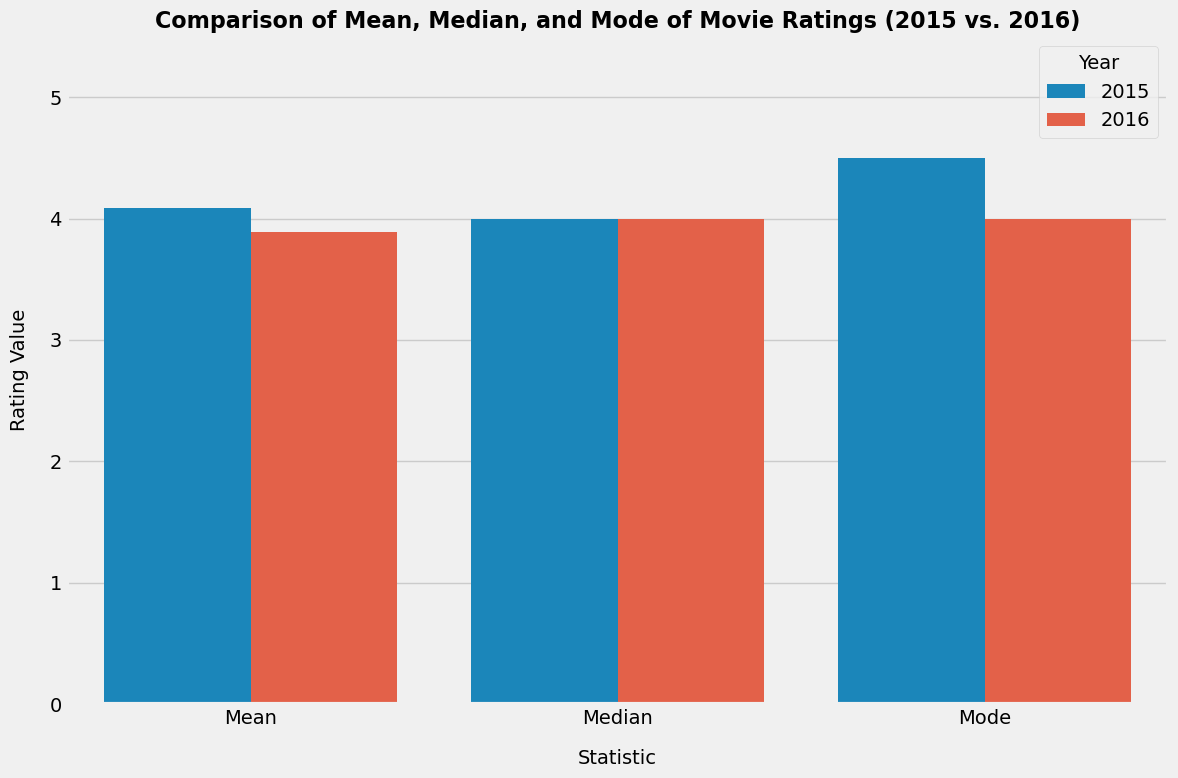

In [31]:
# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Statistic',
    y='value',
    hue='year',
    data=pd.melt(
        summary_stats,
        id_vars=['Statistic'],
        var_name='year',
        value_name='value'
    )
)

# Title and labels
plt.title('Comparison of Mean, Median, and Mode of Movie Ratings (2015 vs. 2016)', fontsize=16, weight='bold')
plt.xlabel('Statistic', fontsize=14, labelpad=15)
plt.ylabel('Rating Value', fontsize=14, labelpad=15)
plt.ylim(0,5.5)
plt.xticks(rotation=0)
plt.legend(title='Year', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

## Comparison of Summary Statistics for 2015 and 2016 Movie Ratings

To better understand the differences in Fandango’s ratings for popular movies in 2015 and 2016, the mean, median, and mode for each sample were analyzed.

---

### Analysis of Metrics:

1. **Mean**:  
   - 2015: **4.085**  
   - 2016: **3.887**  
   - The average rating in 2016 is **0.198 points lower** than in 2015, indicating slightly lower overall ratings.  

2. **Median**:  
   - Both years have a median of **4.0**, suggesting that the central tendency of the distributions remains consistent.  

3. **Mode**:  
   - 2015: **4.5**  
   - 2016: **4.0**  
   - The most common rating in 2016 shifted down by **0.5 points**, reflecting a noticeable change in rating patterns.  

---

### Direction of the Difference
The data shows that Fandango’s ratings in 2016 were generally lower than in 2015. The decrease in the mean and the shift in the mode confirm this trend.

---

### Magnitude of the Difference
- The **0.198-point difference** in means, while small, is statistically meaningful on a 0–5 scale.  
- The shift in mode from **4.5 to 4.0** highlights a clear preference for slightly lower ratings in 2016.  

---

### Summary
The comparison reveals a subtle but consistent decrease in Fandango ratings for 2016 compared to 2015. These findings support the hypothesis that Fandango adjusted its rating system or scoring approach between the two years.

## Conclusion

This project aimed to investigate whether Fandango adjusted its movie rating system following criticism in 2015. To explore this, I analyzed datasets containing Fandango's ratings for popular movies released in 2015 and 2016. The analysis involved comparing rating distributions and calculating summary statistics, such as the mean, median, and mode, to identify potential changes.

The findings show that while Fandango's ratings remained predominantly high, 2016 ratings were slightly lower on average compared to 2015. The observed shift, reflected in kernel density plots and statistical summaries, was modest, with the mean dropping from **4.08** to **3.89** and the mode shifting from **4.5** to **4.0**. These results suggest that any adjustments to the rating system were minor, offering a nuanced view of Fandango's response to earlier scrutiny.